# Adding necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import random
from sklearn.model_selection import train_test_split

import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import get_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import average_precision_score, precision_recall_curve, PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

!pip install imblearn
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule, OneSidedSelection, TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

SEEDER = 21

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Loading the dataset

In [ ]:
df = pd.read_csv('data.csv')
df

,y,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,...,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
0,0,2,1,5,1,6,0,1,0,0,...,4,0,2,8,0,0,0,1,1,0
1,0,2,1,6,0,0,0,0,0,1,...,9,2,3,7,0,0,1,0,0,0
2,0,2,1,9,0,0,1,0,0,0,...,5,0,2,6,0,1,0,1,1,0
3,0,1,1,6,0,0,1,0,0,0,...,3,0,4,8,0,0,1,0,0,0
4,0,1,1,5,1,0,0,1,0,0,...,4,3,1,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,1,1,2,1,0,1,0,0,0,...,8,2,2,7,1,1,0,0,1,0
595208,0,5,1,10,0,0,0,0,1,0,...,11,0,4,12,0,1,1,0,0,0
595209,0,1,1,7,0,0,0,1,0,0,...,8,0,4,9,0,0,0,0,1,0
595210,1,7,1,5,1,1,0,0,0,1,...,2,0,5,10,0,1,1,0,0,0


## General data review

In [ ]:
df_rows, df_cols = df.shape
print(f"Number of records: {df_rows}\nNumber of attributes: {df_cols}\n")

Number of records: 595212
Number of attributes: 58



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   y             595212 non-null  int64  
 1   xind_01       595212 non-null  int64  
 2   xind_02_cat   595212 non-null  int64  
 3   xind_03       595212 non-null  int64  
 4   xind_04_cat   595212 non-null  int64  
 5   xind_05_cat   595212 non-null  int64  
 6   xind_06_bin   595212 non-null  int64  
 7   xind_07_bin   595212 non-null  int64  
 8   xind_08_bin   595212 non-null  int64  
 9   xind_09_bin   595212 non-null  int64  
 10  xind_10_bin   595212 non-null  int64  
 11  xind_11_bin   595212 non-null  int64  
 12  xind_12_bin   595212 non-null  int64  
 13  xind_13_bin   595212 non-null  int64  
 14  xind_14       595212 non-null  int64  
 15  xind_15       595212 non-null  int64  
 16  xind_16_bin   595212 non-null  int64  
 17  xind_17_bin   595212 non-null  int64  
 18  xind

Checking how many unique values are in each column

In [ ]:
df.nunique()

y                   2
xind_01             8
xind_02_cat         5
xind_03            12
xind_04_cat         3
xind_05_cat         8
xind_06_bin         2
xind_07_bin         2
xind_08_bin         2
xind_09_bin         2
xind_10_bin         2
xind_11_bin         2
xind_12_bin         2
xind_13_bin         2
xind_14             5
xind_15            14
xind_16_bin         2
xind_17_bin         2
xind_18_bin         2
xreg_01            10
xreg_02            19
xreg_03          5013
xcar_01_cat        13
xcar_02_cat         3
xcar_03_cat         3
xcar_04_cat        10
xcar_05_cat         3
xcar_06_cat        18
xcar_07_cat         3
xcar_08_cat         2
xcar_09_cat         6
xcar_10_cat         3
xcar_11_cat       104
xcar_11             5
xcar_12           184
xcar_13         70482
xcar_14           850
xcar_15            15
xcalc_01           10
xcalc_02           10
xcalc_03           10
xcalc_04            6
xcalc_05            7
xcalc_06           11
xcalc_07           10
xcalc_08  

As we can see most of the columns are categorical, but there are some "outliers" (for example `xcar_13`, `xreg_03` or `xcar_14`).

In this step we will count how many missing records are in each column.

In [ ]:
empty_cols = {}
for column in df.columns:
    empty_cols[column] = len(df[df[column] == -1])
    
sorted_d = dict(sorted(empty_cols.items(), key=operator.itemgetter(1), reverse=True))
for key, value in sorted_d.items():
    print(key, ':\t', value)

xcar_03_cat :	 411231
xcar_05_cat :	 266551
xreg_03 :	 107772
xcar_14 :	 42620
xcar_07_cat :	 11489
xind_05_cat :	 5809
xcar_09_cat :	 569
xind_02_cat :	 216
xcar_01_cat :	 107
xind_04_cat :	 83
xcar_02_cat :	 5
xcar_11 :	 5
xcar_12 :	 1
y :	 0
xind_01 :	 0
xind_03 :	 0
xind_06_bin :	 0
xind_07_bin :	 0
xind_08_bin :	 0
xind_09_bin :	 0
xind_10_bin :	 0
xind_11_bin :	 0
xind_12_bin :	 0
xind_13_bin :	 0
xind_14 :	 0
xind_15 :	 0
xind_16_bin :	 0
xind_17_bin :	 0
xind_18_bin :	 0
xreg_01 :	 0
xreg_02 :	 0
xcar_04_cat :	 0
xcar_06_cat :	 0
xcar_08_cat :	 0
xcar_10_cat :	 0
xcar_11_cat :	 0
xcar_13 :	 0
xcar_15 :	 0
xcalc_01 :	 0
xcalc_02 :	 0
xcalc_03 :	 0
xcalc_04 :	 0
xcalc_05 :	 0
xcalc_06 :	 0
xcalc_07 :	 0
xcalc_08 :	 0
xcalc_09 :	 0
xcalc_10 :	 0
xcalc_11 :	 0
xcalc_12 :	 0
xcalc_13 :	 0
xcalc_14 :	 0
xcalc_15_bin :	 0
xcalc_16_bin :	 0
xcalc_17_bin :	 0
xcalc_18_bin :	 0
xcalc_19_bin :	 0
xcalc_20_bin :	 0


Also, how many rows contain at least one missing value

In [ ]:
len(df[df.isin([-1]).any(axis=1)])

470281

As we can see there are 2 columns that mostly consist of missing values, so we will get rid of them 

In [ ]:
df = df.drop(columns=["xcar_03_cat", "xcar_05_cat"])

In [ ]:
# df = df.replace(-1, np.nan)

Unfortunately, due to the low capacity of RAM and CPU on a Deepnote, I was made to smaller the dataframe and use just a part of all data. That is why my outcome results may vary from the ground truth a little bit :(

In case you have bigger capacity, you may delete the command down below and run my examination again for all data.

In [ ]:
df = df.loc[:10000]

## Splitting the dataset

The next function helps to divide the whole dataset into train (70%), test (15%) and validation (15%) sets

In [ ]:
def data_splitting(dataframe):
    data = dataframe.copy()

    target = data.loc[:, df.columns == 'y']
    predictors = data.loc[:, df.columns != 'y']

    X, predictors_train, Y, target_train = train_test_split(predictors, target, 
                                                            test_size=0.7, random_state=SEEDER, shuffle=True)
    predictors_test, predictors_val, target_test, target_val = train_test_split(X, Y, 
                                                            test_size=0.5, random_state=SEEDER, shuffle=True)

    print(">> Predictors <<")
    print(f'Train: {predictors_train.shape}\nValidation: {predictors_val.shape}\nTest: {predictors_test.shape}')

    print("\n>> Target <<")
    print(f'Train: {target_train.shape}\nValidation: {target_val.shape}\nTest: {target_test.shape}')

    return predictors_train, predictors_test, predictors_val, target_train, target_test, target_val

# Classification

This function helps to display 8 different confusion matrixes (for each classificator separately)

In [ ]:
def plot_confusion_matrix(matrixes):
    figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

    for index, (name, matrix_labels) in enumerate(matrixes.items()):
        m = ConfusionMatrixDisplay(confusion_matrix=matrix_labels[0],
                                    display_labels=matrix_labels[1])
        m.plot(ax=axes[index%4][index//4])
        axes[index%4][index//4].set(title='Confusion matrix for '+ name)

    plt.show()

This function helps to perform classification with 8 different classification methods (see `classificator_parameters`). In addition, I performed a small GridSearch of `classificator_parameters` to produce the best performance of each method.

**Input:** dataframes with predictors (55 columns) and target (`"y"` column in out case), other optional parameters

**Output:** 2 graphs (ROC and Precision-Recall curves), dataframe with some basic performance metrics (accuracy, precision, f1, recall, score...) and 8 confusion matrixes (for each classificator)

In [ ]:
def classification_pipeline(p_data_train, p_data_test, t_data_train, t_data_test, scale=True, norm=None):
    classificator_names = [
        "Logistic Regression", 
        "Naive Bayes", 
        "K-Nearest Neighbors", 
        "Linear SVM", 
        "RBF SVM", 
        "Decision Tree", 
        "Random Forest", 
        "Neural Network"]

    classificator_functions = [
        LogisticRegression(random_state=0, n_jobs=-1), 
        GaussianNB(), 
        KNeighborsClassifier(n_jobs=-1), 
        SVC(random_state=0, kernel="linear", probability=True, max_iter=500), 
        SVC(random_state=0, kernel="rbf", gamma=2, probability=True, max_iter=500), 
        DecisionTreeClassifier(random_state=0),
        RandomForestClassifier(random_state=0, n_jobs=-1),
        MLPClassifier(random_state=0, solver='lbfgs', hidden_layer_sizes=(5, 2))]

    classificator_parameters = [
        {'C': [1, 5, 10], 'max_iter': [100, 300]},
        {'priors': [[1 - t_data_train.mean(), t_data_train.mean()]]},
        {'n_neighbors': [3, 5, 10]},
        {'C': [0.025, 1, 5, 10]},
        {'C': [0.025, 1, 5, 10]},
        {'max_depth': [3, 5, 20], 'criterion': ["gini", "entropy", "log_loss"]},
        {'n_estimators': [100, 200], 'max_depth': [3, 5, 20], 'max_features': [1, 5, 7]},
        {'learning_rate_init': [0.001, 0.0001], 'max_iter': [300, 500]},
    ]

    # standardize all predictors by removing their mean and then scaling to unit variance:
    if scale:
        scaler = StandardScaler()
        scaler.fit(p_data_train)
        p_data_train = scaler.transform(p_data_train)
        p_data_test = scaler.transform(p_data_test)

    # empty dataframe of metrics
    metrics = pd.DataFrame({'Classificator Name': pd.Series(dtype='str'),
                   'Best Score (%)': pd.Series(dtype='str'),
                   'Accuracy (%)': pd.Series(dtype='float'),
                   'Precision (%)': pd.Series(dtype='float'),
                   'Recall (%)': pd.Series(dtype='float'),
                   'F1-score (%)': pd.Series(dtype='float'),
                   'Best Hyperparameters': pd.Series(dtype='str')})

    # empty dictionary of matrixes
    matrixes = {}

    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # execute for each classificator
    for index in range(len(classificator_names)):
        name = classificator_names[index]
        function = classificator_functions[index]
        parameters = classificator_parameters[index]

        # perform gridsearch and fit the model
        gscv = GridSearchCV(function, parameters, n_jobs=-1) # scoring=get_scorer('roc_auc'), 
        result = gscv.fit(p_data_train, t_data_train)

        # make some predictions
        t_pred = result.predict(p_data_test)

        # count basic metrics about classificator performance
        best_score = np.round(gscv.best_score_ * 100, decimals=3)
        accuracy = np.round(accuracy_score(t_data_test, t_pred) * 100, decimals=3)
        precision = np.round(precision_score(t_data_test, t_pred) * 100, decimals=3)
        recall = np.round(recall_score(t_data_test, t_pred) * 100, decimals=3)
        f1 = np.round(f1_score(t_data_test, t_pred) * 100, decimals=3)

        m = {'Classificator Name': name, 'Best Score (%)': best_score, 
            'Best Hyperparameters': result.best_params_, 'Accuracy (%)': accuracy,
            'Precision (%)': precision, 'Recall (%)': recall, 'F1-score (%)': f1}
        metrics = metrics.append(m, ignore_index = True)
        
        # add the confusion matrix of the classificator
        matrix = confusion_matrix(t_data_test, t_pred, labels=result.classes_, normalize=norm)
        matrixes[name] = (matrix, result.classes_)

        # ROC curve
        fpr, tpr, _ = roc_curve(t_data_test, t_pred)
        roc_auc = auc(fpr, tpr)
        curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
        curve.plot(ax=axes[0], label=f"AUC = {roc_auc:0.3f}, " + name)

        # Precision - Recall curve
        p, r, _ = precision_recall_curve(t_data_test, t_pred)
        avg_p = average_precision_score(t_data_test, t_pred)
        curve = PrecisionRecallDisplay(precision=p, recall=r, average_precision=avg_p, estimator_name=name)
        curve.plot(ax=axes[1], label=f"P = {avg_p:0.3f}, " + name)

    axes[0].set(title='ROC curve of models', xlabel='False Positive Rate', ylabel='True Positive Rate')
    axes[1].set(title='Precision-Recall curve', xlabel='Precision', ylabel='Recall')
    axes[0].legend(loc='lower right')
    axes[1].legend()

    plt.show()

    return metrics.set_index('Classificator Name'), matrixes

## Unbalanced data

First of all, we will check classification performance on the input dataset

In [ ]:
p_data_train, p_data_test, _, t_data_train, t_data_test, _ = data_splitting(df)

>> Predictors <<
Train: (7001, 55)
Validation: (1500, 55)
Test: (1500, 55)

>> Target <<
Train: (7001, 1)
Validation: (1500, 1)
Test: (1500, 1)


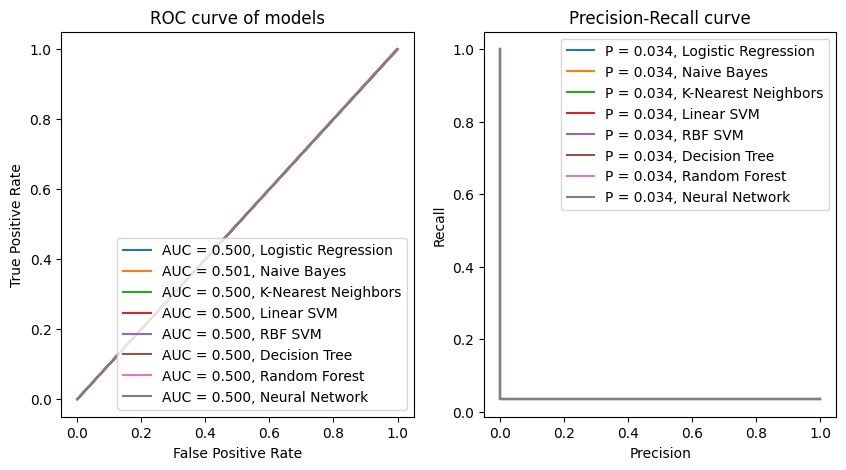

In [ ]:
metrics, matrixes = classification_pipeline\
                    (p_data_train, p_data_test, t_data_train, t_data_test, scale=True, norm="all")

As we may notice, both curves are pretty bad and there is no leader among our classificators.

In [ ]:
metrics

,Best Score (%),Accuracy (%),Precision (%),Recall (%),F1-score (%),Best Hyperparameters
Classificator Name,,,,,,
Logistic Regression,96.372,96.600,0.000,0.0,0.000,"{'C': 1, 'max_iter': 100}"
Naive Bayes,4.371,3.667,3.409,100.0,6.593,"{'priors': [[0.963719468647336], [0.0362805313..."
K-Nearest Neighbors,96.372,96.600,0.000,0.0,0.000,{'n_neighbors': 10}
Linear SVM,96.372,96.600,0.000,0.0,0.000,{'C': 0.025}
RBF SVM,96.372,96.600,0.000,0.0,0.000,{'C': 0.025}
Decision Tree,96.343,96.600,0.000,0.0,0.000,"{'criterion': 'entropy', 'max_depth': 3}"
Random Forest,96.372,96.600,0.000,0.0,0.000,"{'max_depth': 3, 'max_features': 1, 'n_estimat..."
Neural Network,96.272,96.600,0.000,0.0,0.000,"{'learning_rate_init': 0.001, 'max_iter': 300}"


The best results among these (terrible) outcomes produces Naive Bayes and Neural Network. But still the process may not be marked as successfull classification.

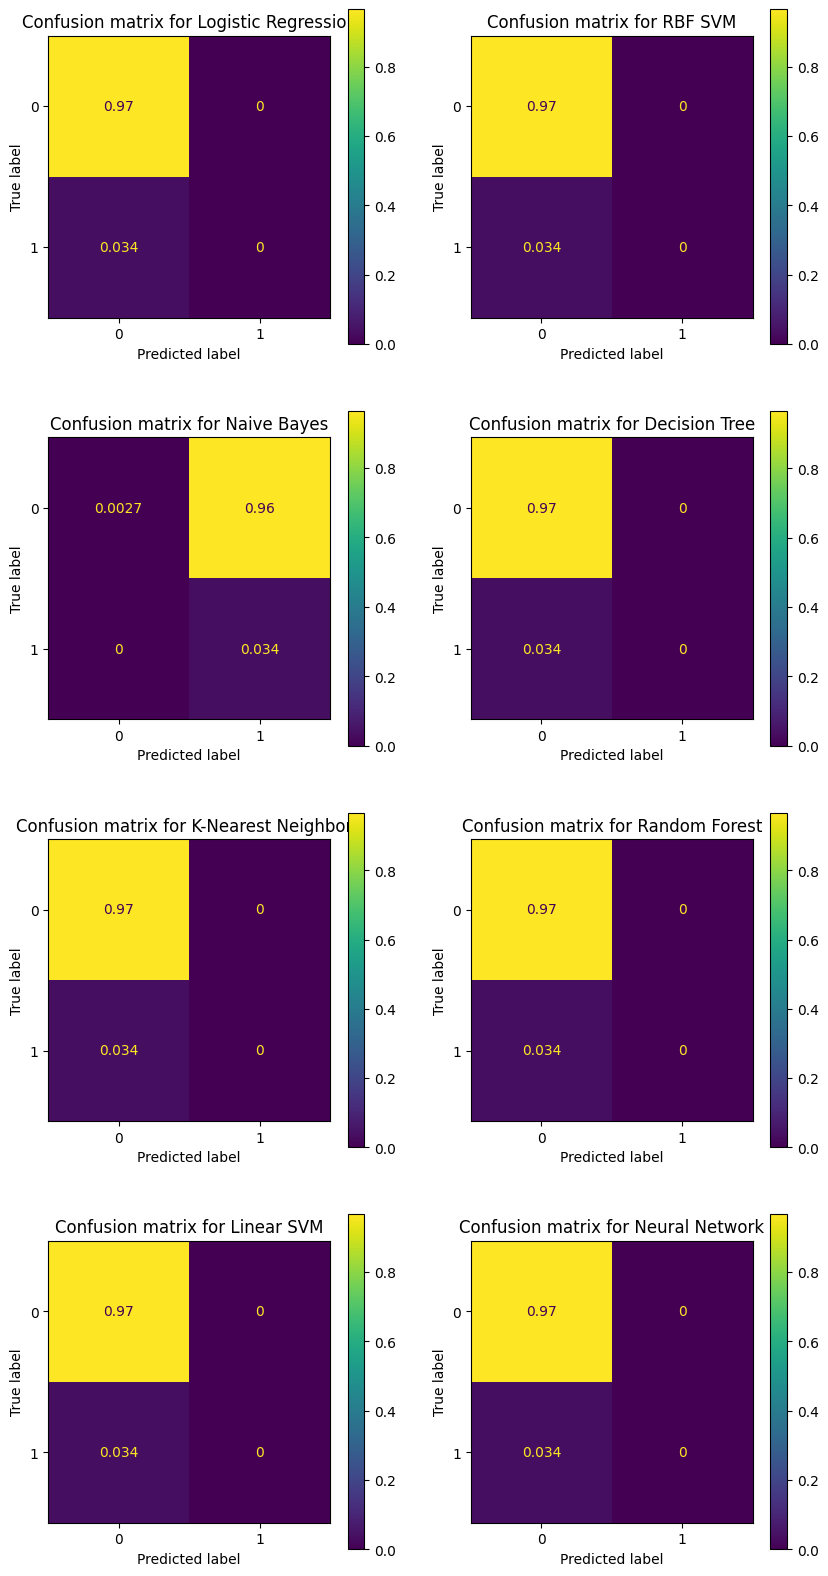

In [ ]:
plot_confusion_matrix(matrixes)

We also may notice that most of classificators have high value of `accuracy` while classifying input as 0 (in most cases). This situation occurs due to the fact that out target column (`"y"`) mainly consist of 0 values

In [ ]:
print(t_data_train["y"].value_counts())
print(t_data_test["y"].value_counts())

0    6747
1     254
Name: y, dtype: int64
0    1449
1      51
Name: y, dtype: int64


# Binning

In [ ]:
binning_df = df.copy()

Lets check out continuous or ordinal attributes

xind_01 column:	[2 1 0 5 3 4 6 7]


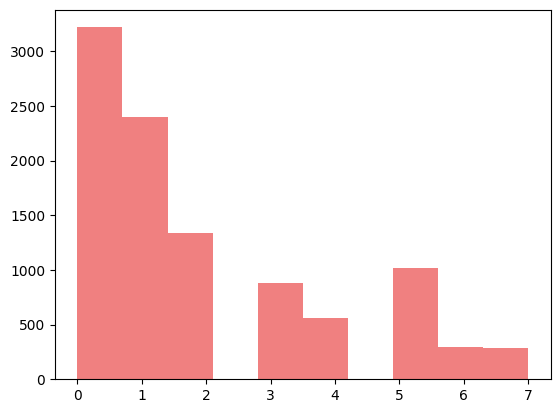

xind_03 column:	[ 5  6  9  2  3  1  0  4  7 10  8 11]


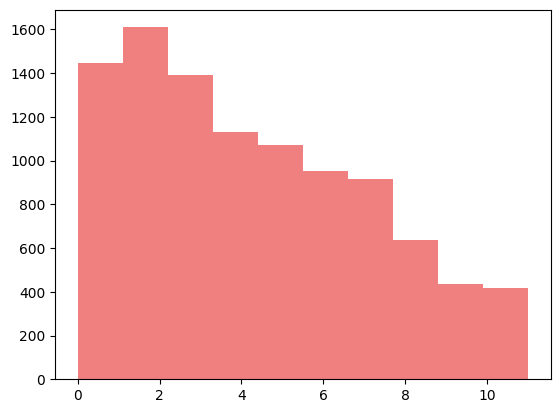

xind_14 column:	[0 1 3 2]


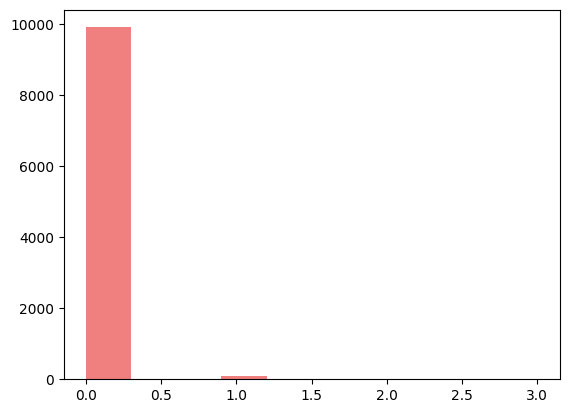

xind_15 column:	[10 12  6 11  0  5  7  9  8  4 13  2  3  1]


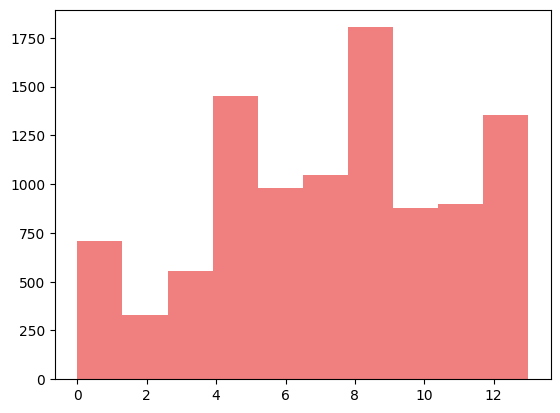

xreg_01 column:	[0.6 0.4 0.1 0.8 0.7 0.9 0.  0.5 0.2 0.3]


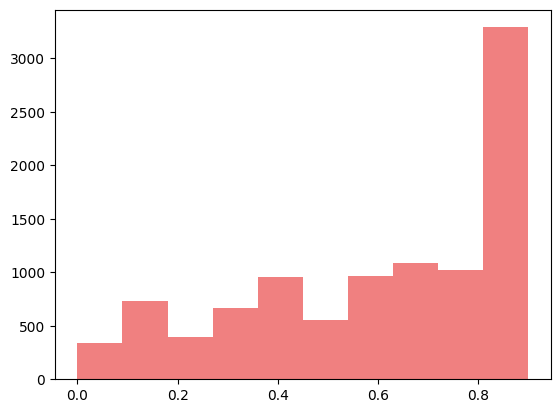

xreg_02 column:	[0.  0.1 0.3 0.5 1.1 0.9 0.2 0.7 1.4 0.4 0.6 1.3 1.  0.8 1.8 1.2 1.5 1.6
 1.7]


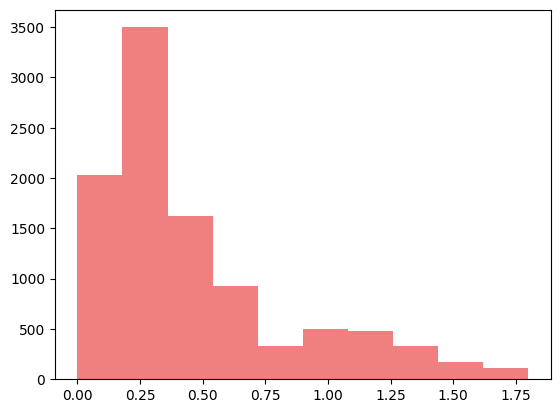

xreg_03 column:	[ 0.60259854  0.51112621 -1.         ...  1.14181872  1.27671453
  1.46266025]


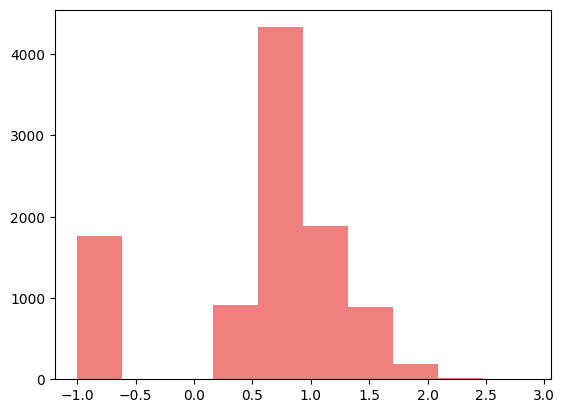

xcar_11 column:	[3 2 0 1]


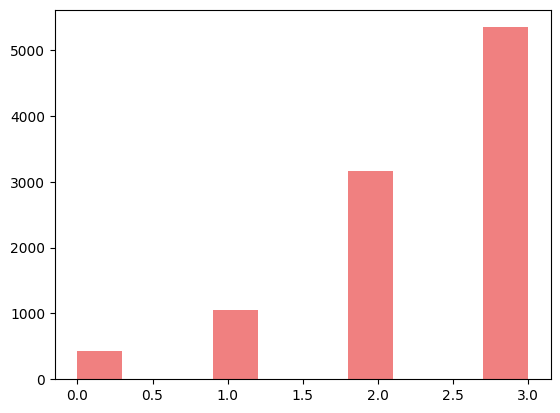

xcar_12 column:	[0.31622777 0.4        0.37416574 0.54772256 0.48989795 0.38729833
 0.6476882  0.31606961 0.4472136  0.44710178 0.42426407 0.47958315
 0.6244998  0.36055513 0.39987498 0.56568542 0.39974992 0.44698993
 0.39937451 0.51961524 0.31527766 0.44542115 0.4237924  0.42201896
 0.39749214 0.31559468 0.57445626 0.52915026 0.39949969 0.59160798
 0.44586994 0.39837169 0.4240283  0.51536395 0.42355637 0.44687806
 0.39799497 0.44654227 0.5        0.40841156 0.36878178 0.39471509
 0.52896125 0.44598206 0.44665423 0.39433488 0.49769469 0.31575307
 0.33166248 0.6        0.49939964 0.5745433  0.43588989 0.46904158
 0.46882833 0.4241462  0.38691084 0.78740079 0.63245553 0.64031242
 0.6164414  0.53244718 0.81853528 0.48969378 0.39522146 0.4236744
 0.43566042 0.3726929  0.39761791 0.47539457 0.41797129 0.60827625
 0.44553339 0.44620623 0.14142136 0.50049975 0.42178193 0.65559134
 0.39862263 0.64807407 0.41231056 0.52763624 0.70710678 0.39812058
 0.66332496 0.76811457 0.39962482 0.37255872 0.

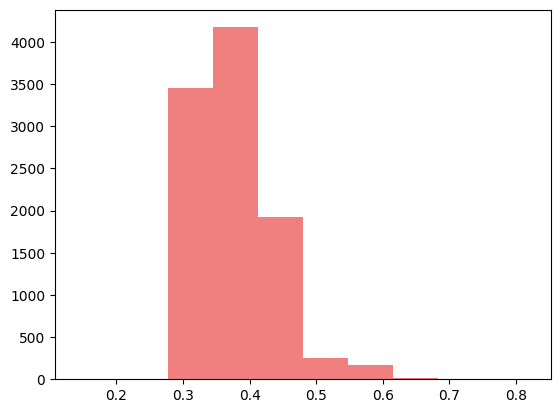

xcar_13 column:	[0.74835909 0.73867482 0.82051435 ... 0.67223569 1.03901177 0.91579347]


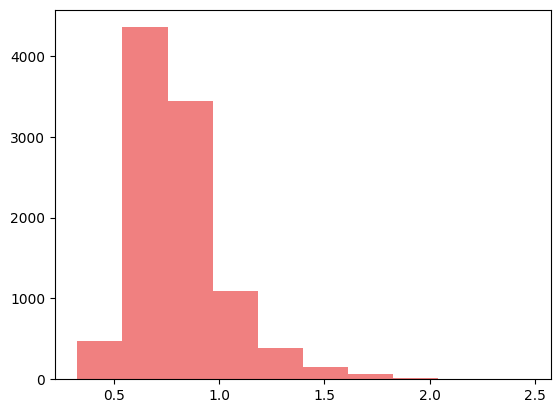

xcar_14 column:	[-1.          0.40137264  0.33136083  0.36878178  0.42567593  0.38209946
  0.44609416  0.36193922  0.33615473  0.37215588  0.38262253  0.43634848
  0.48476799  0.36646964  0.42918527  0.39623226  0.36660606  0.36851052
  0.36674242  0.5329165   0.43081318  0.39849718  0.35213634  0.32249031
  0.37469988  0.32480764  0.35777088  0.47434165  0.55045436  0.34669872
  0.3241913   0.39585351  0.35986108  0.43011626  0.32557641  0.39242834
  0.35        0.40620192  0.36152455  0.36        0.40249224  0.32140317
  0.41291646  0.32710854  0.31859065  0.30166206  0.35832946  0.40533936
  0.39749214  0.28879058  0.40348482  0.29444864  0.33030289  0.38742741
  0.37456642  0.41856899  0.38483763  0.5186521   0.42743421  0.33882149
  0.42696604  0.4         0.38144462  0.40743098  0.40865633  0.32171416
  0.36013886  0.30740852  0.42308392  0.37080992  0.32015621  0.31811947
  0.36166283  0.44497191  0.4180909   0.38613469  0.41593269  0.35071356
  0.33075671  0.40841156  0.3096772

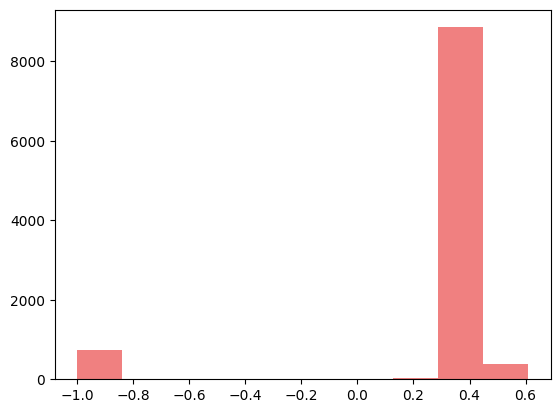

xcar_15 column:	[3.60555128 2.82842712 3.74165739 3.         3.46410162 3.31662479
 0.         2.23606798 2.64575131 3.16227766 1.         1.73205081
 2.44948974 2.         1.41421356]


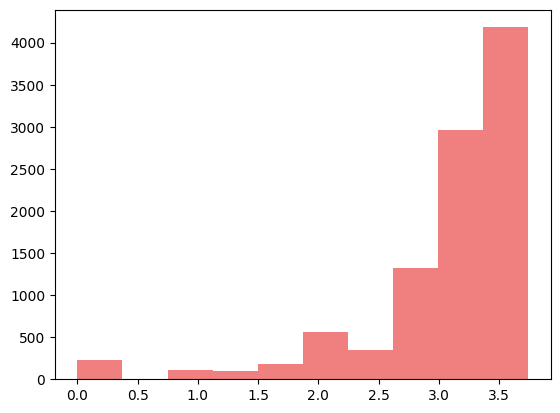

xcalc_01 column:	[0.4 0.7 0.2 0.  0.9 0.5 0.8 0.6 0.1 0.3]


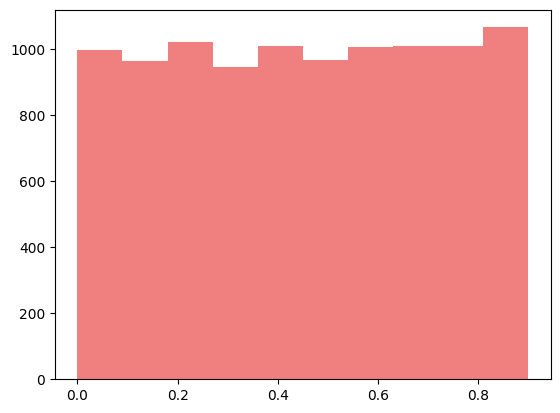

xcalc_02 column:	[0.9 0.7 0.3 0.5 0.6 0.8 0.2 0.1 0.  0.4]


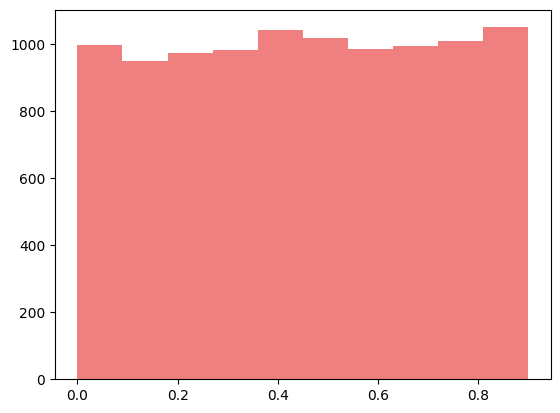

xcalc_03 column:	[0.6 0.2 0.  0.9 0.4 0.8 0.1 0.7 0.5 0.3]


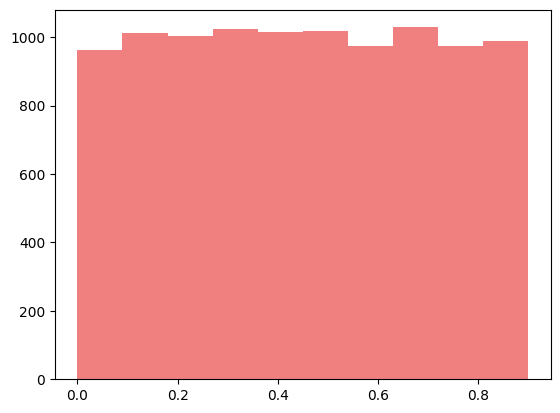

xcalc_04 column:	[2 4 3 0 1 5]


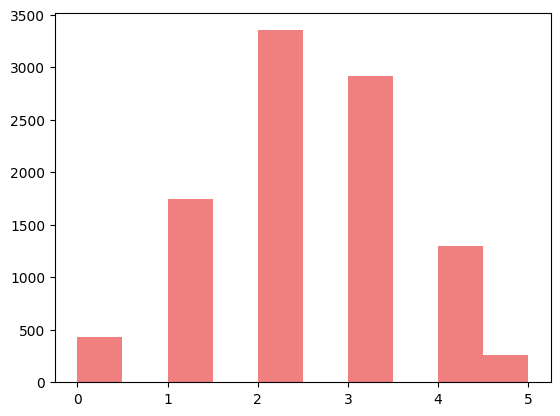

xcalc_05 column:	[0 3 1 2 4 5 6]


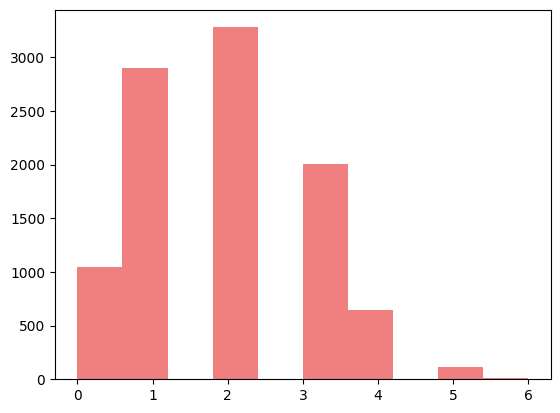

xcalc_06 column:	[ 6  9 10  7  8  3  5  4  2]


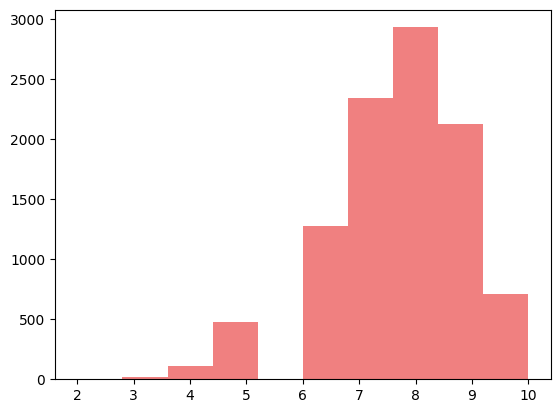

xcalc_07 column:	[3 5 4 0 2 1 6 7 8]


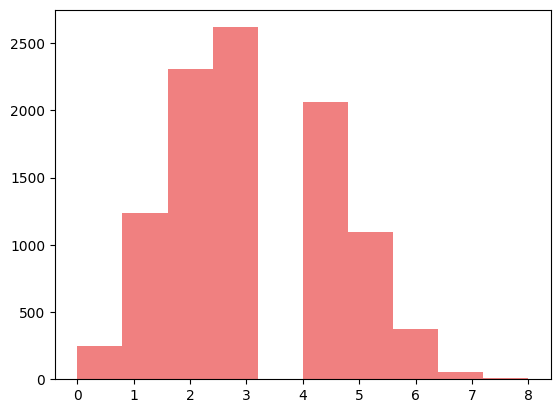

xcalc_08 column:	[ 4 10  9 11  6  8 12  7  5  3]


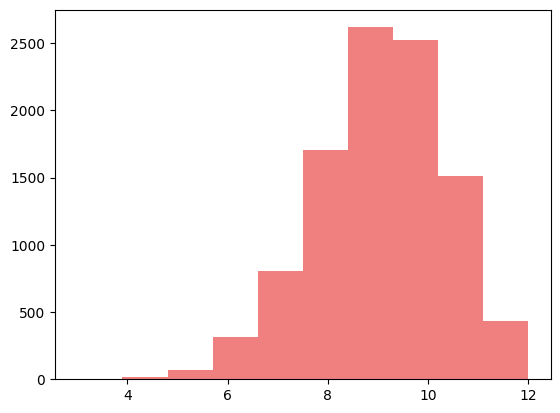

xcalc_09 column:	[2 1 3 0 4 5 6 7]


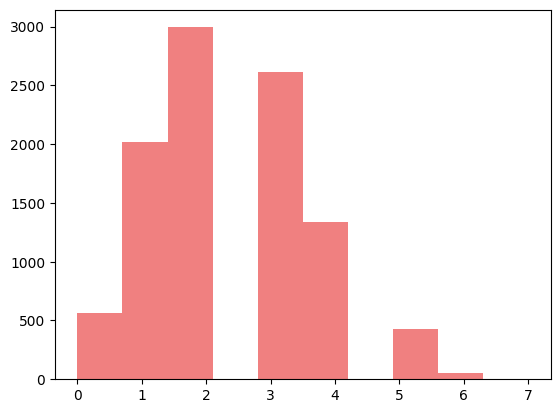

xcalc_10 column:	[ 4 11  9  6  0 12  3  8  7 10 13 15 20  2 19 14  5  1 16 17 22 18 21]


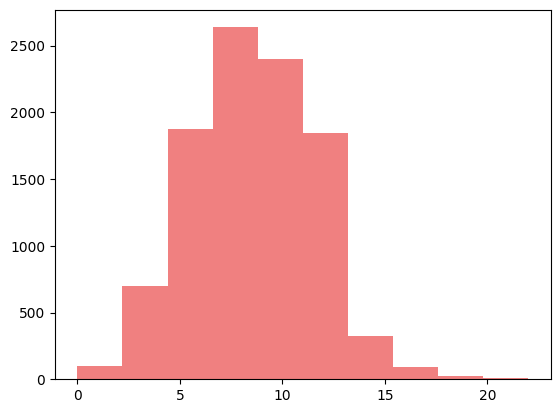

xcalc_11 column:	[ 4  9  5  3  8  6  7  2  1 10 11 14 15 13  0 12]


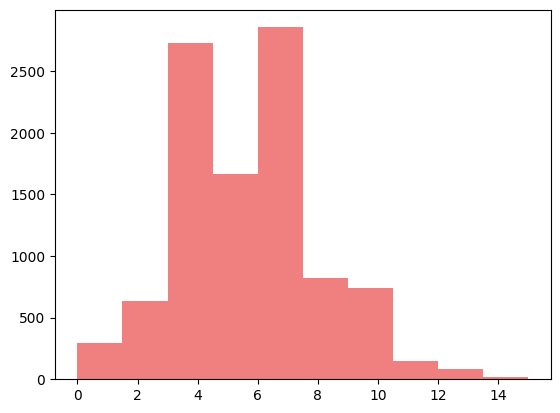

xcalc_12 column:	[0 2 3 4 1 5 6 7 8]


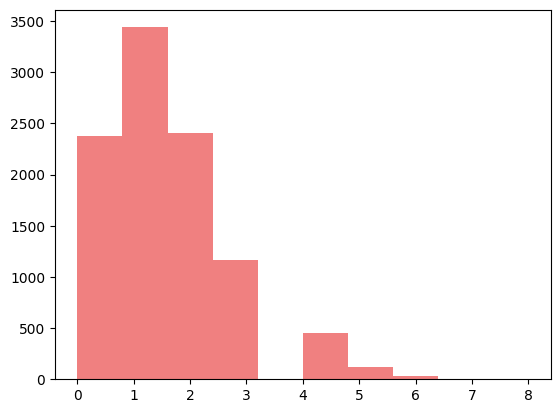

xcalc_13 column:	[ 2  3  4  1  0  6  5  7  9  8 10 11]


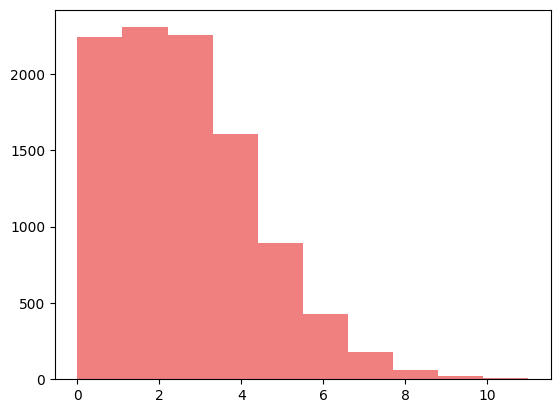

xcalc_14 column:	[ 8  7  6  2  5  4  9 10 15  3 14 13 12 11  1 17 18 16 21  0 19]


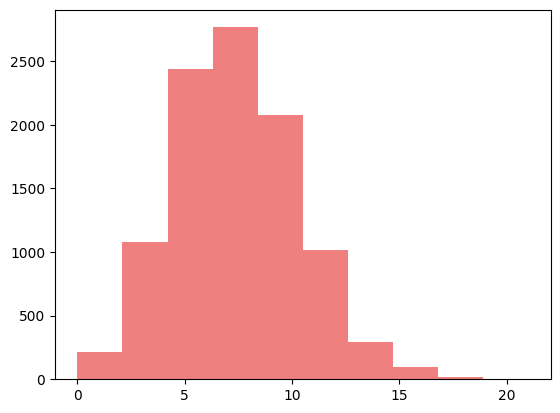

In [ ]:
continuous_columns = [not ('bin' in c or 'cat' in c or c == 'y') for c in binning_df.columns]

for column in binning_df.columns[continuous_columns]:
    plt.hist(binning_df[column], label=f'Histogram for {column} column', color="lightcoral")
    print(f'{column} column:\t{binning_df[column].unique()}')
    plt.show()

## Equal width (or distance) binning

In this part we will divide well-distributed columns into equal parts.

Down below we divided `"xcalc_01"` column into equal parts - bines, the number of which was defined as sqrt(number of unique values in the column)

In [ ]:
unique_01 = binning_df["xcalc_01"].nunique()
num_of_bins_01 = int(np.ceil(unique_01**(1/2)))
labels_01 = list(range(1, num_of_bins_01 + 1))
binning_df["xcalc_01"] = pd.cut(binning_df["xcalc_01"], num_of_bins_01, labels=labels_01)
binning_df["xcalc_01"].value_counts()

4    3086
1    2983
3    1975
2    1957
Name: xcalc_01, dtype: int64

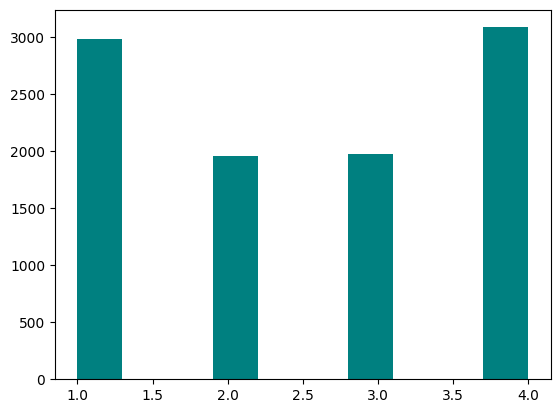

In [ ]:
plt.hist(binning_df["xcalc_01"], label=f'Histogram for xcalc_01 column', color="teal")
plt.show()

We also tried to divide `"xcalc_02"` column by defining bin edges

In [ ]:
bin_edges = [0, 0.3, 0.6, 0.9]
labels_02 = list(range(1, len(bin_edges)))
binning_df["xcalc_02"] = pd.cut(binning_df["xcalc_02"], bin_edges, labels=labels_02)
binning_df["xcalc_02"].value_counts()

3    3055
2    3045
1    2905
Name: xcalc_02, dtype: int64

(array([2905.,    0.,    0.,    0.,    0., 3045.,    0.,    0.,    0.,
        3055.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

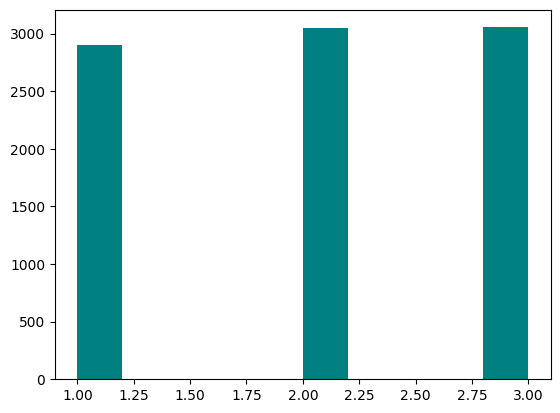

In [ ]:
plt.hist(binning_df["xcalc_02"], label=f'Histogram for xcalc_02 column', color="teal")

And the last column `"xcalc_03"` we divided into part by appying math function on the whole column. Probably, it was the least successful method, as there is a bigger group disbalance in comparison to the previous methods.

In [ ]:
binning_df['xcalc_03'] = binning_df['xcalc_03'].apply(lambda x: np.rint(x*2))
binning_df["xcalc_03"].value_counts()

1.0    5060
0.0    2979
2.0    1962
Name: xcalc_03, dtype: int64

(array([2979.,    0.,    0.,    0.,    0., 5060.,    0.,    0.,    0.,
        1962.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

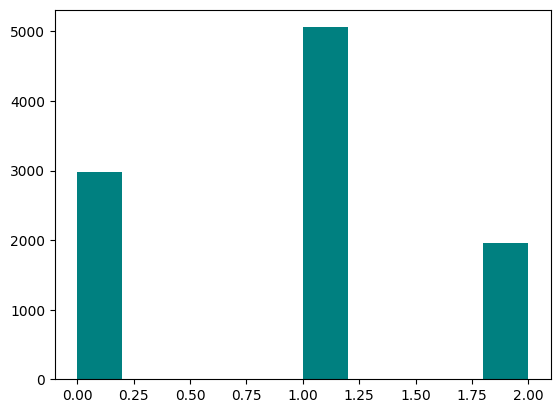

In [ ]:
plt.hist(binning_df["xcalc_03"], label=f'Histogram for xcalc_03 column', color="teal")

## Equal depth (or frequency) binning

In this part we decided to perform binning according to the quantile ranges of the column

In [ ]:
# Function for basic histogram displaying
def plot_hist(df, column):
    fig, ax = plt.subplots()
    sns.distplot(df[column], color="tan")
    ax.set_title('Histogram of ' + column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

In [ ]:
# Function for displaying histogram with quantiles
def hist_with_quantiles(df, column, quantiles):
    quantiles_lines = df[column].quantile(quantiles)

    fig, ax = plt.subplots()
    sns.distplot(df[column], color="tan")
    for q in quantiles_lines:
        ql = plt.axvline(q, color='indianred')
    ax.legend([ql], ['Quantiles'])
    ax.set_title(' Histogram of ' + column + ' (with quantiles)')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

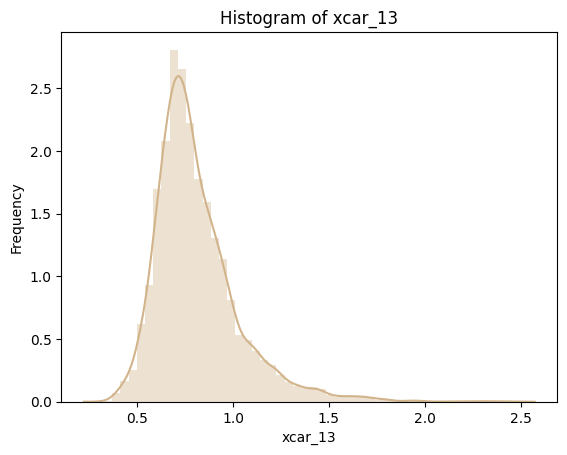

In [ ]:
plot_hist(binning_df, "xcar_13")

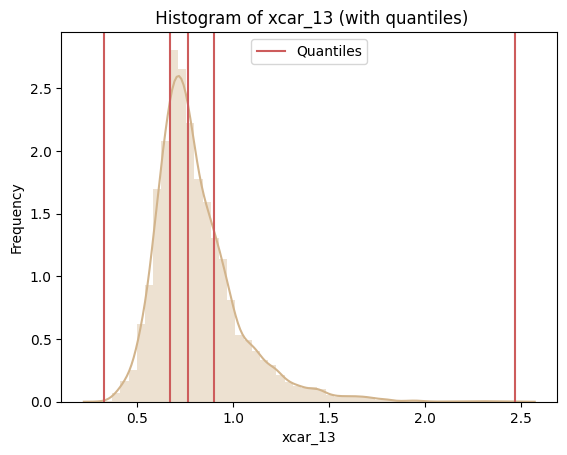

In [ ]:
quantiles_basic = [0, .25, .5, .75, 1.]
hist_with_quantiles(binning_df, "xcar_13", quantiles_basic)

Here `"xcar_13"` column was divided into 4 bins with 0-25, 25-50, 50-75 and 75-100 quantile range

In [ ]:
labels_basic = [1, 2, 3, 4]
binning_df['xcar_13'] = pd.qcut(binning_df['xcar_13'], q=quantiles_basic, labels=labels_basic)
binning_df['xcar_13'].value_counts()

1    2502
2    2500
4    2500
3    2499
Name: xcar_13, dtype: int64

(array([2502.,    0.,    0., 2500.,    0.,    0., 2499.,    0.,    0.,
        2500.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

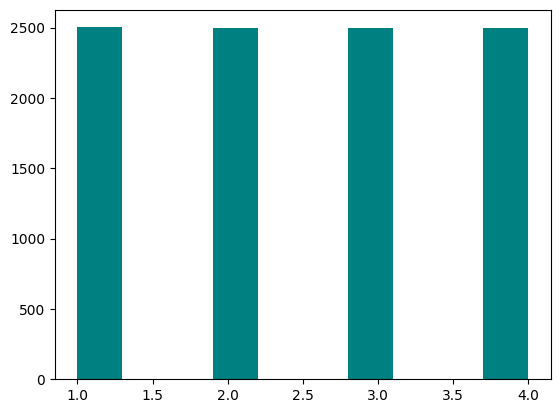

In [ ]:
plt.hist(binning_df["xcar_13"], label=f'Histogram for xcar_13 column', color="teal")

As we can see 4 balanced group have been created. Looks good, so we will continue doing this to the similar values

In [ ]:
binning_df['xcalc_10'] = pd.qcut(binning_df['xcalc_10'], q=quantiles_basic, labels=labels_basic)
binning_df['xcalc_11'] = pd.qcut(binning_df['xcalc_11'], q=quantiles_basic, labels=labels_basic)
binning_df['xcalc_14'] = pd.qcut(binning_df['xcalc_14'], q=quantiles_basic, labels=labels_basic)

And then I decided to try another quantile range for `"xcar_12"` column

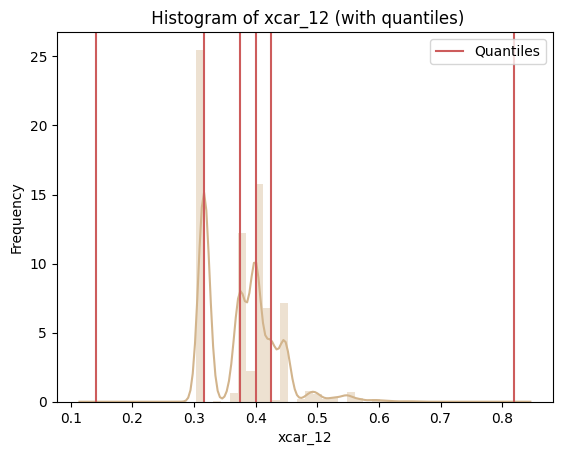

In [ ]:
quantiles_20 = [0, .2, .4, .6, .8, 1.]
hist_with_quantiles(binning_df, "xcar_12", quantiles_20)

Finally, I divided this column into 5 parts and set value in the each part to the mean value of the whole bin range

In [ ]:
# smoothing by mean value
bin_border = np.array(binning_df["xcar_12"].quantile(quantiles_20))
labels_20 = np.mean(list(zip(bin_border[:-1], bin_border[1:])),axis=1)
binning_df['xcar_12'] = pd.qcut(binning_df['xcar_12'], q=quantiles_20, labels=labels_20)
binning_df['xcar_12'].value_counts()

0.2288245611     3453
0.38708286935    2409
0.34519675235    1742
0.62139967295    1456
0.41213203435     941
Name: xcar_12, dtype: int64

## Testing

>> Predictors <<
Train: (6304, 55)
Validation: (1351, 55)
Test: (1350, 55)

>> Target <<
Train: (6304, 1)
Validation: (1351, 1)
Test: (1350, 1)


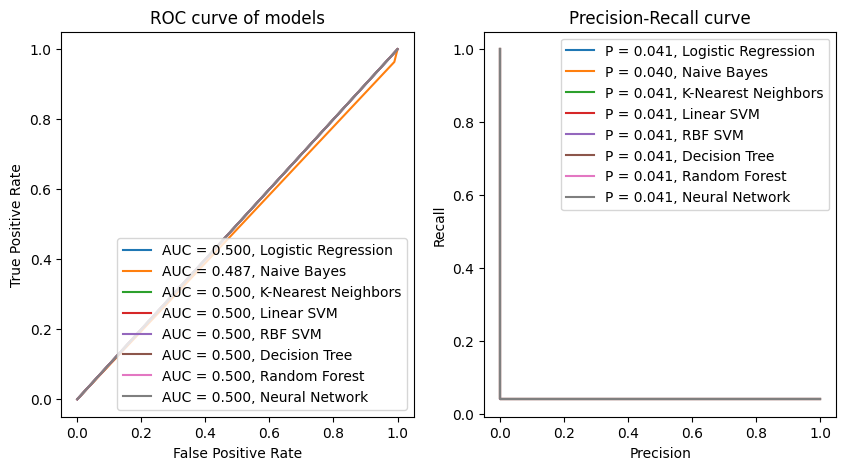

In [ ]:
binning_df = binning_df.dropna()
p_binning_train, p_binning_test, _, t_binning_train, t_binning_test, _ = data_splitting(binning_df)
bin_metrics, bin_matrixes = classification_pipeline\
                    (p_binning_train, p_binning_test, t_binning_train, t_binning_test, scale=True, norm="all")

In [ ]:
bin_metrics

,Best Score (%),Accuracy (%),Precision (%),Recall (%),F1-score (%),Best Hyperparameters
Classificator Name,,,,,,
Logistic Regression,96.336,95.926,0.00,0.000,0.000,"{'C': 1, 'max_iter': 100}"
Naive Bayes,4.600,4.889,3.97,96.364,7.626,"{'priors': [[0.9633565989847716], [0.036643401..."
K-Nearest Neighbors,96.336,95.926,0.00,0.000,0.000,{'n_neighbors': 10}
Linear SVM,96.336,95.926,0.00,0.000,0.000,{'C': 0.025}
RBF SVM,96.336,95.926,0.00,0.000,0.000,{'C': 0.025}
Decision Tree,96.336,95.926,0.00,0.000,0.000,"{'criterion': 'entropy', 'max_depth': 3}"
Random Forest,96.336,95.926,0.00,0.000,0.000,"{'max_depth': 3, 'max_features': 1, 'n_estimat..."
Neural Network,96.240,95.926,0.00,0.000,0.000,"{'learning_rate_init': 0.001, 'max_iter': 300}"


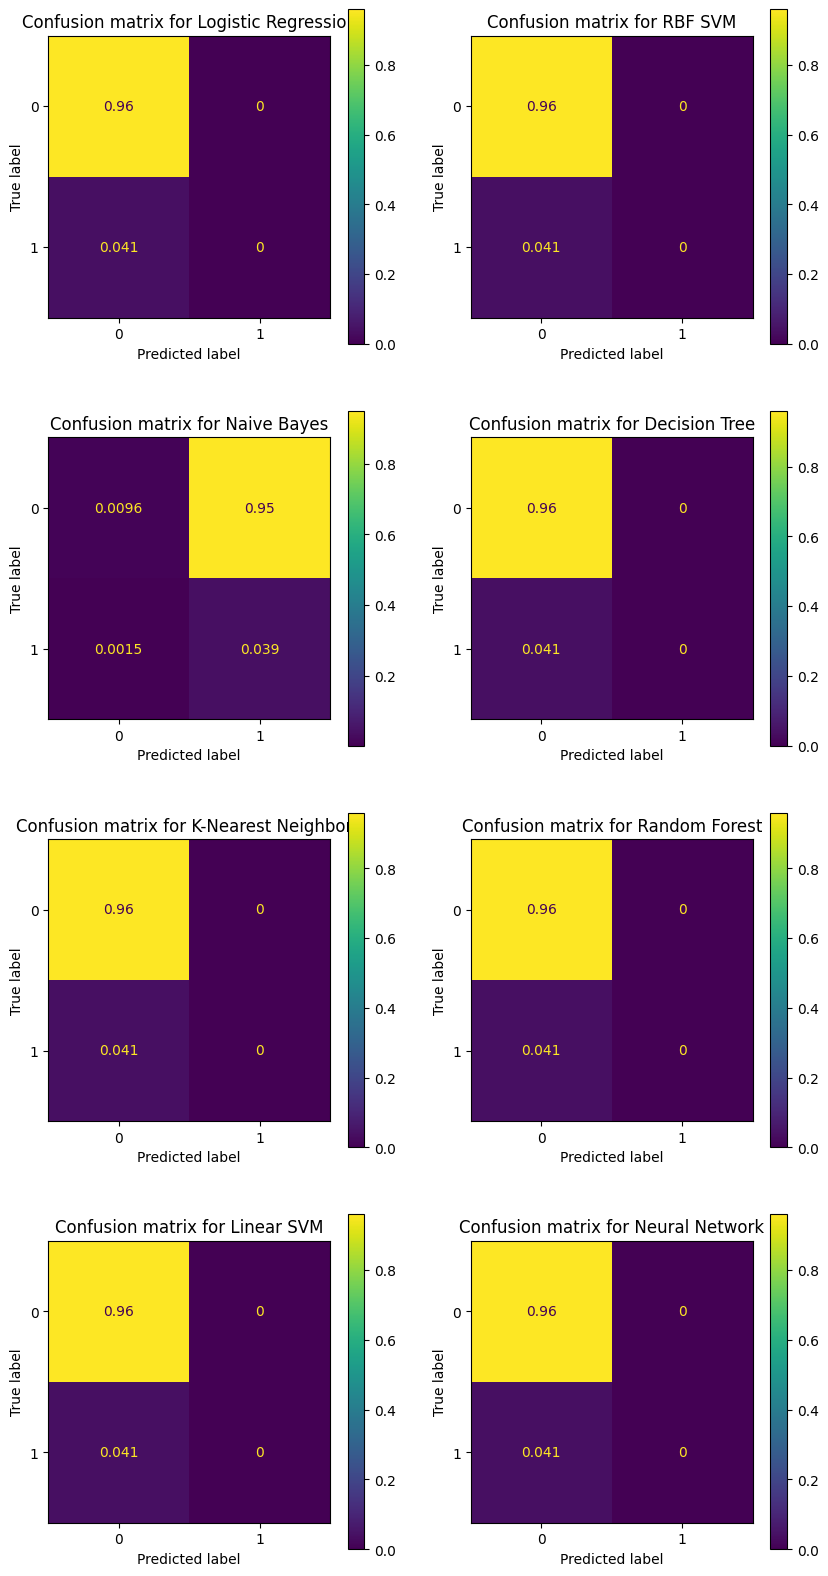

In [ ]:
plot_confusion_matrix(bin_matrixes)

## Conclusion

All in all, we perfomed classification task on the binned dataset. Unfortunately, I found out that **no major improvement are visible**. All of the confusion matrixes, ROC and Precision-Recall curves remain almost the same (just average P value increased a little bit).

As a small (possible future) improvement we may try to perform binning in another ways. For example with supervised method - entropy-based binning. To perform it you may use its implementation here: *https://github.com/paulbrodersen/entropy_based_binning*

# Balancing

In [ ]:
balancing_df = df.copy()

First of all, we will look at our 55 predictors and their class distribution 

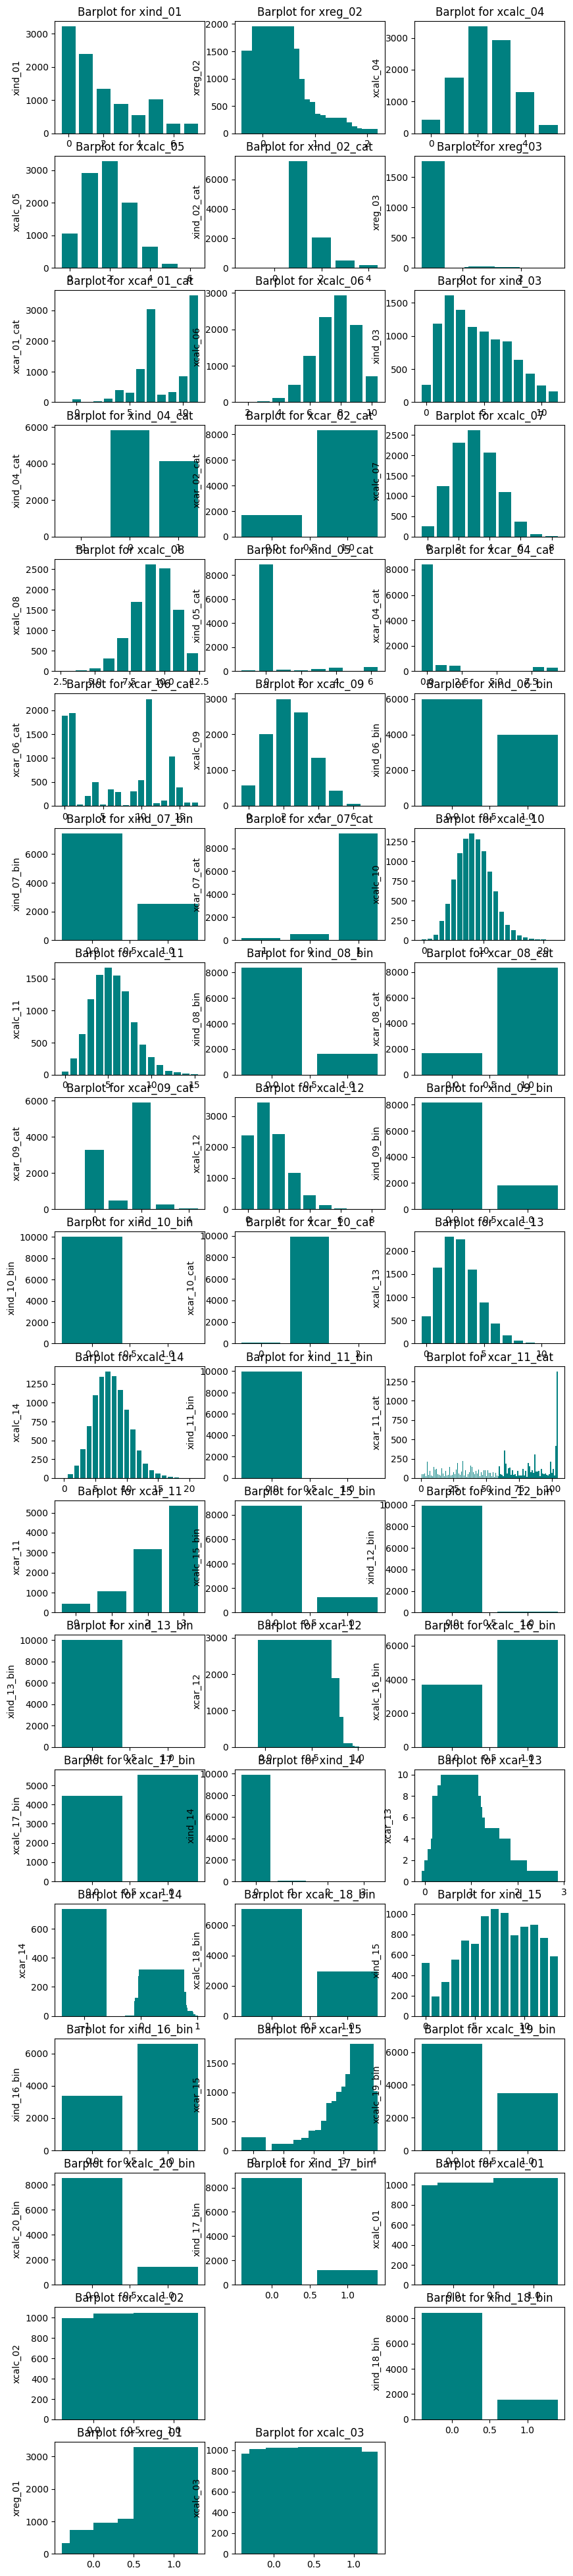

In [ ]:
predictors_columns = [not (c == 'y') for c in balancing_df.columns]
fig, axes = plt.subplots(nrows=19, ncols=3, figsize=(10, 50))

for index, column in enumerate(balancing_df.columns[predictors_columns]):
    ax = axes[index%19][index%3]
    ax.bar(balancing_df[column].value_counts().index, balancing_df[column].value_counts(), color="teal")
    ax.set_ylabel(column)
    ax.set_title('Barplot for ' + column)
fig.delaxes(axes[17][1])
fig.delaxes(axes[18][2])

As we may notice majority of columns have a big disbalance among their classes. For example, check these columns: `"xcalc_15_bin"`, `"xcalc_18_bin"`, `"xcalc_19_bin"`, `"xcalc_20_bin"`, `"xcar_02_cat"`, `"xcar_04_cat"`, `"xcar_07_cat"`, `"xcar_08_cat"`, `"xcar_10_cat"`, from `"xind_07_bin"` to `"xind_18_bin"` and so on...

In this section we will try to balance such columns and perform classification one more time.

First of all, we will define 2 main functions:

- `resample_data` (perform resampling and then run classification with new data)
**Input:** dataframe and array of resamplers that we want to try on it
**Output:** ROC and Precision-Recall curve plotted for each resampler, dictionary in the format "name of the resampler" : ("dataframe of basic metrics", "8 matrixes")
- `plot_param_lines` (additionally to the clasic classification output compare some basic performance metrics in one graph)

In [ ]:
def plot_param_lines(results):
    cols = ["Best Score (%)", "Accuracy (%)", "Precision (%)", "Recall (%)", "F1-score (%)"]

    # dictionary 
    # key    : value
    # metric : dataframe of outputs for each classificator and resampler
    r_lines = dict()
    for c in cols:
        classificators = []
        for key, value in results.items():
            # select the dataframe with metrics from the output
            r_metrics = value[0]
            # select one column and transpose it
            _df = (r_metrics[c]).to_frame().rename(columns={c: key}).T
            classificators.append(_df)

        r_lines[c] = pd.concat(classificators, axis=0)

    # plotting all of the metrics
    figure, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 5*8))
    for index,col_ in enumerate(cols):
        my_df = r_lines[col_]
        axes[index].plot(my_df, linestyle="-", marker=".")
        axes[index].legend(my_df)
        axes[index].set(title='Parameter: '+ col_)
        axes[index].tick_params(axis="x", labelrotation=20)
    plt.show()

In [ ]:
def resample_data(r_df, resamplers):
    results = {}
    p_r_train, p_r_test, _, t_r_train, t_r_test, _ = data_splitting(r_df)

    # try all resamplers
    for resampler, description in resamplers:
        # balance the dataset
        new_p_r_train, new_t_r_train = resampler.fit_resample(p_r_train, t_r_train)
        print('\n\n>> ' + description + ' <<')
        # perform classification
        r1, r2 = classification_pipeline\
                (new_p_r_train, p_r_test, new_t_r_train, t_r_test, scale=True, norm="all")
        results[description] = (r1, r2)

    return results

## Under-sampling methods

In this section I performed 6 different methods for under-sampling (see `under_resamplers`)

>> Predictors <<
Train: (7001, 55)
Validation: (1500, 55)
Test: (1500, 55)

>> Target <<
Train: (7001, 1)
Validation: (1500, 1)
Test: (1500, 1)


>> Random under-sampling <<


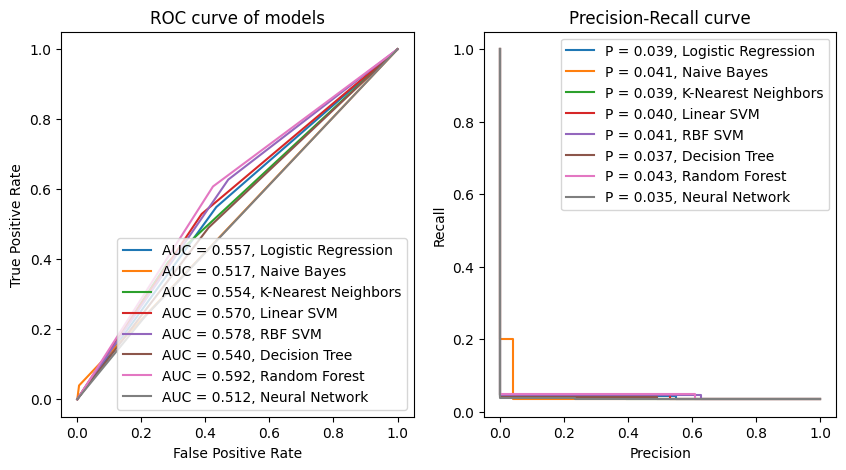



>> Tomek Links <<


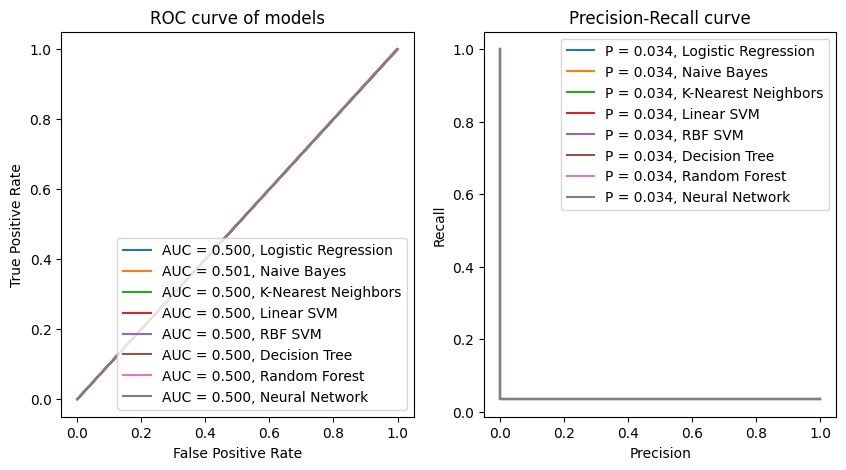



>> ENN <<


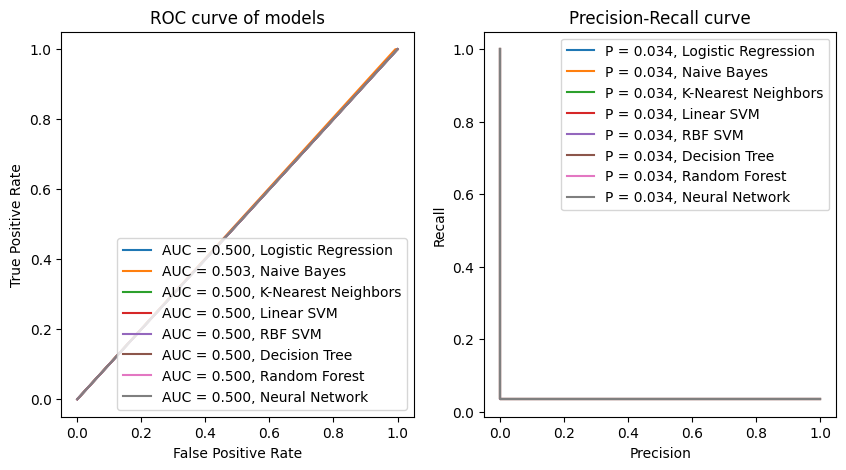



>> Repeated ENN <<


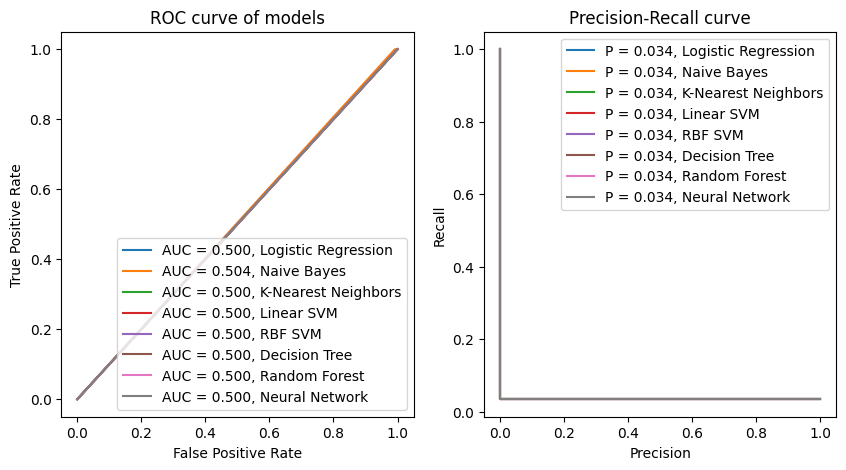



>> Neighbourhood cleaning rule <<


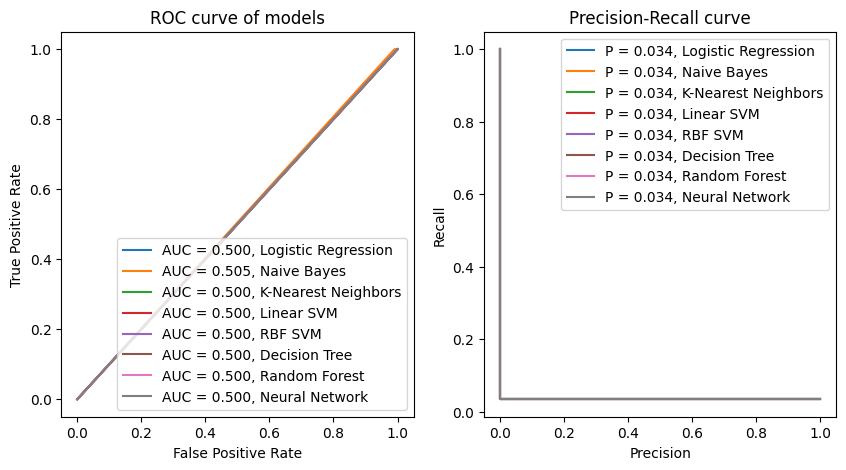



>> OSS <<


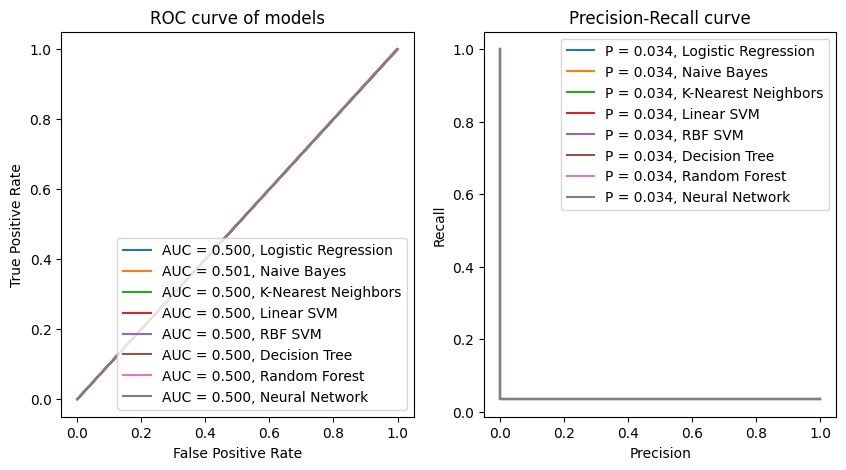

In [ ]:
under_resamplers = [
    (RandomUnderSampler(random_state=SEEDER),'Random under-sampling'),
    (TomekLinks(),'Tomek Links'),
    (EditedNearestNeighbours(),'ENN'),
    (RepeatedEditedNearestNeighbours(), 'Repeated ENN'),
    (NeighbourhoodCleaningRule(), 'Neighbourhood cleaning rule'),
    (OneSidedSelection(random_state=SEEDER), 'OSS')]

under_results = resample_data(balancing_df.copy(), under_resamplers)

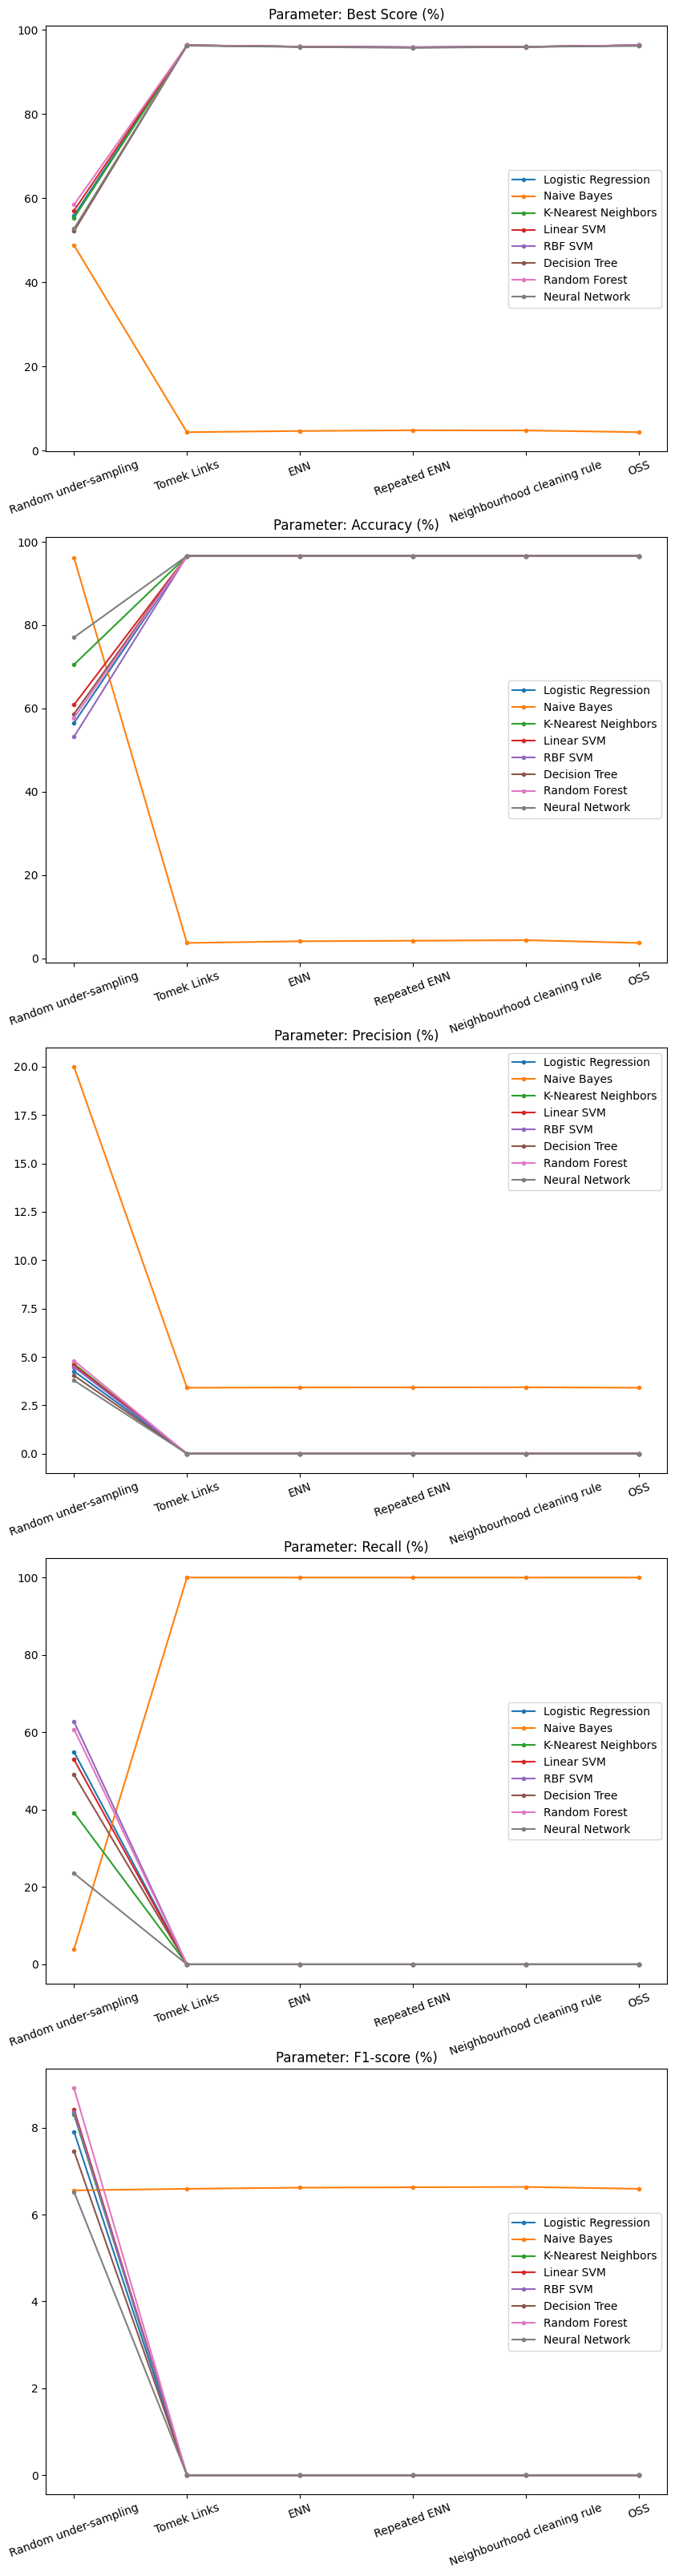

In [ ]:
plot_param_lines(under_results)

## Over-sampling methods

Then I tried 2 methods for over-sampling (see `over_resamplers`)

>> Predictors <<
Train: (7001, 55)
Validation: (1500, 55)
Test: (1500, 55)

>> Target <<
Train: (7001, 1)
Validation: (1500, 1)
Test: (1500, 1)


>> Random over-sampling <<


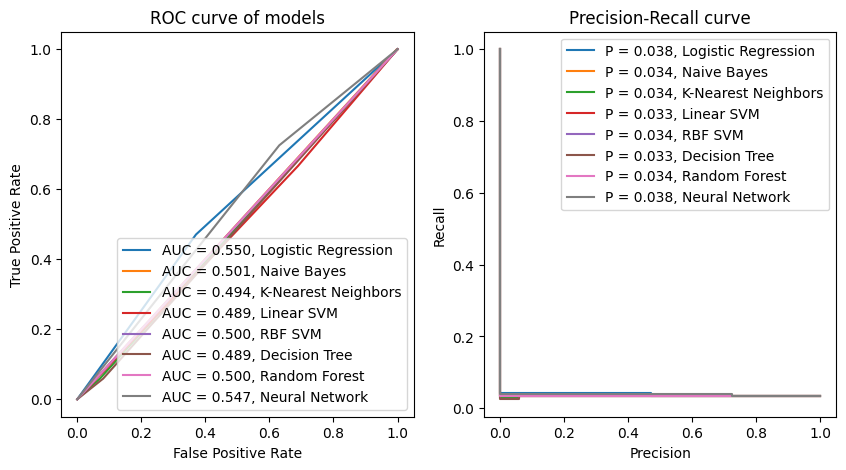



>> SMOTE <<


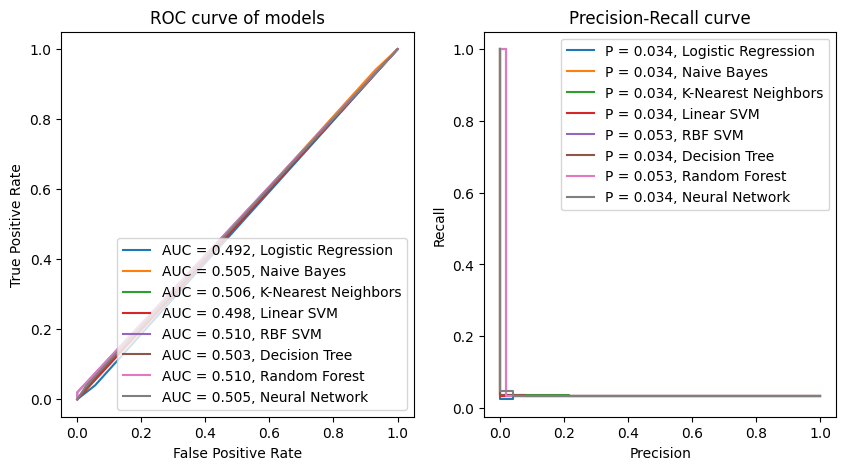

In [ ]:
over_resamplers = [
    (RandomOverSampler(random_state=SEEDER),'Random over-sampling'),
    (SMOTE(random_state=SEEDER),'SMOTE')]

over_results = resample_data(balancing_df.copy(), over_resamplers)

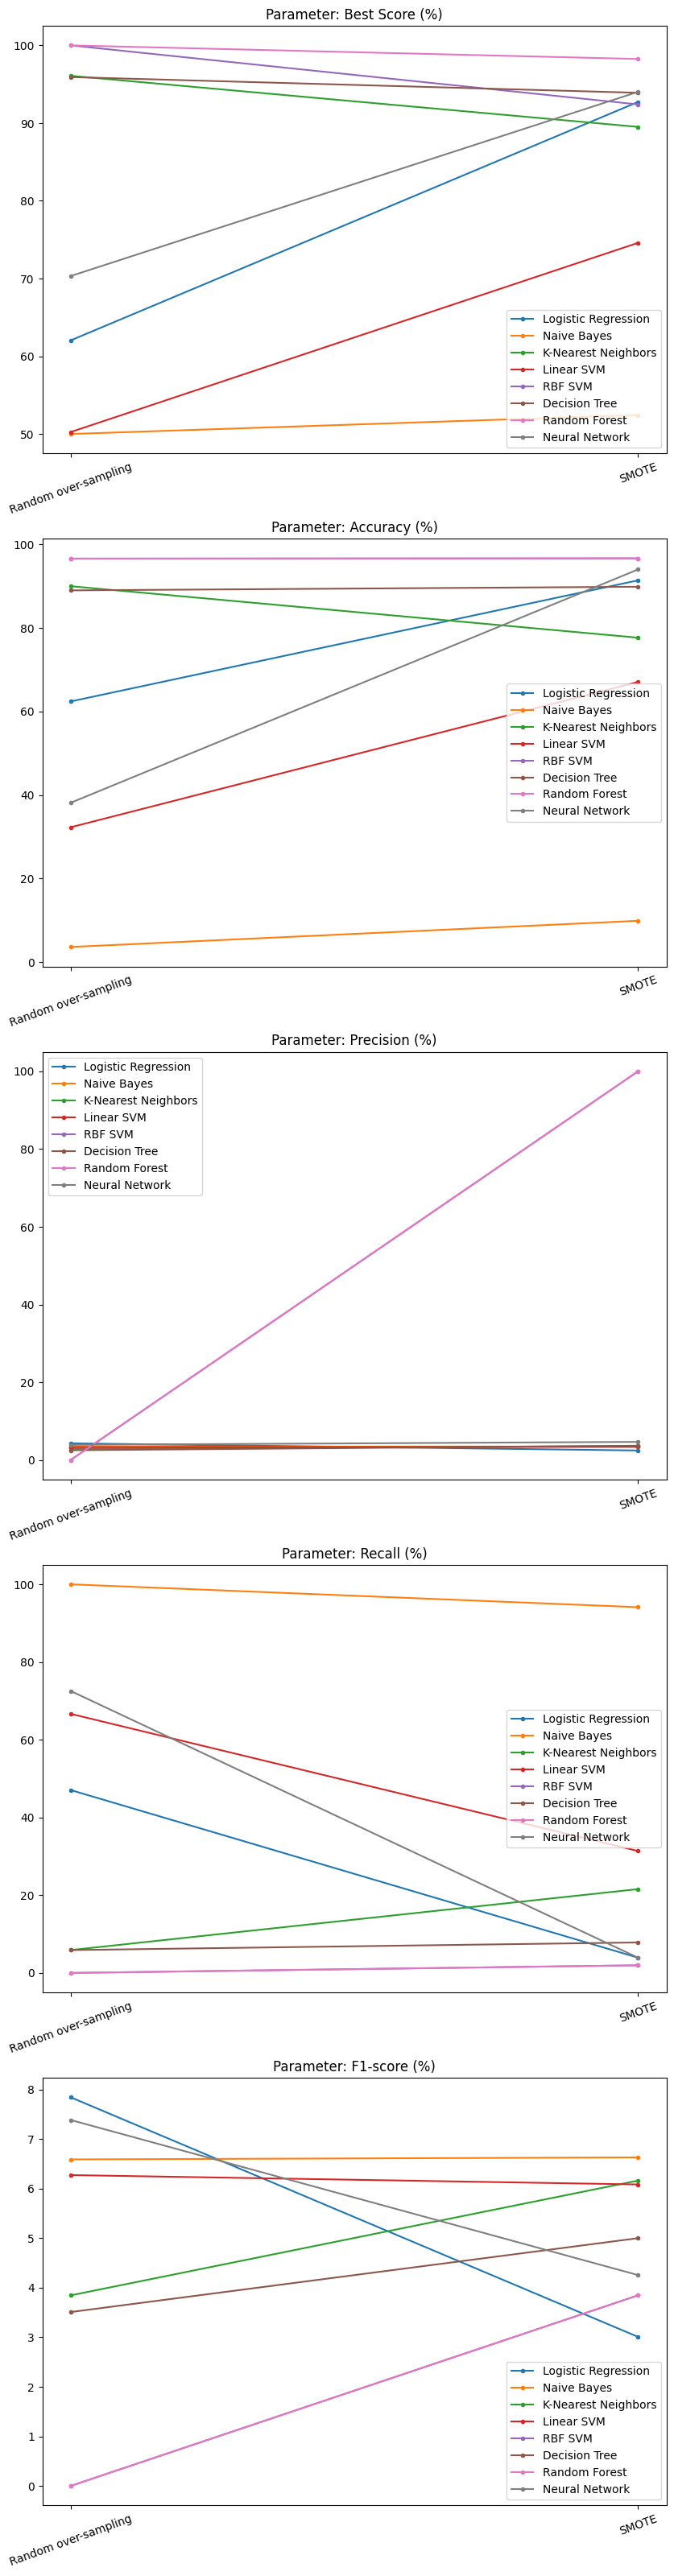

In [ ]:
plot_param_lines(over_results)

## Combine methods

And, finally, I run 2 more methods of combined resampling (adding some data with SMOTE method and then reducing another class with ENN or Tomek links)

>> Predictors <<
Train: (7001, 55)
Validation: (1500, 55)
Test: (1500, 55)

>> Target <<
Train: (7001, 1)
Validation: (1500, 1)
Test: (1500, 1)


>> SMOTE + ENN <<


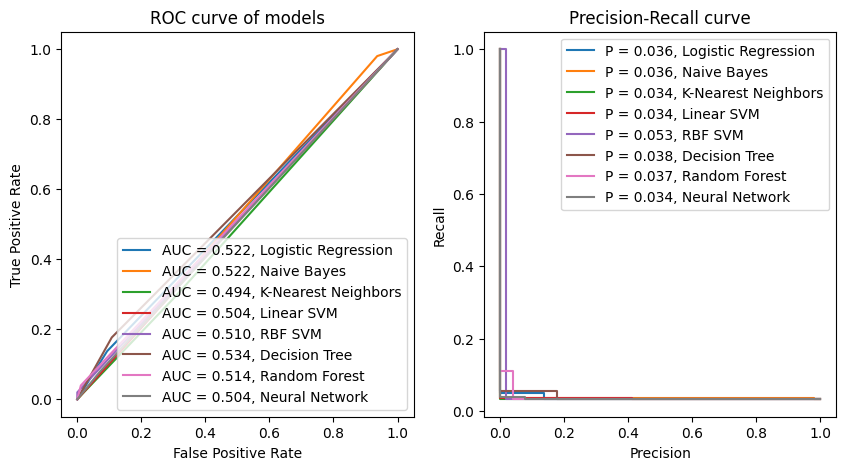



>> SMOTE + Tomek <<


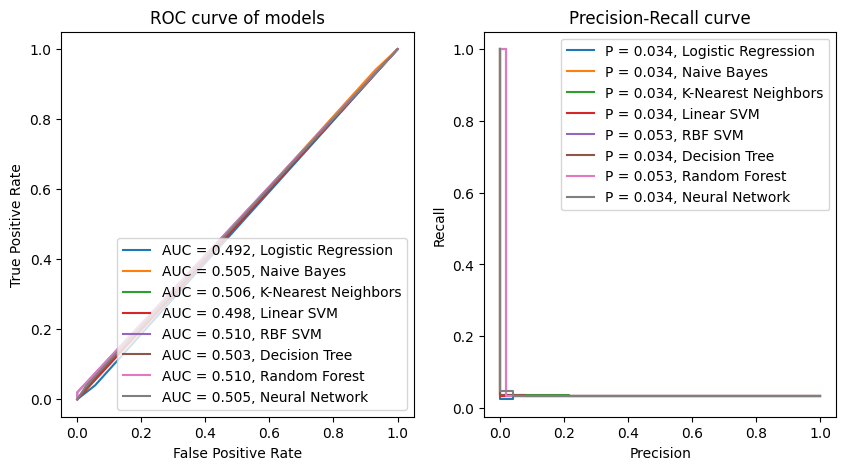

In [ ]:
combine_resamplers = [
    (SMOTEENN(random_state=SEEDER),'SMOTE + ENN'),
    (SMOTETomek(random_state=SEEDER),'SMOTE + Tomek')]

combine_results = resample_data(balancing_df.copy(), combine_resamplers)

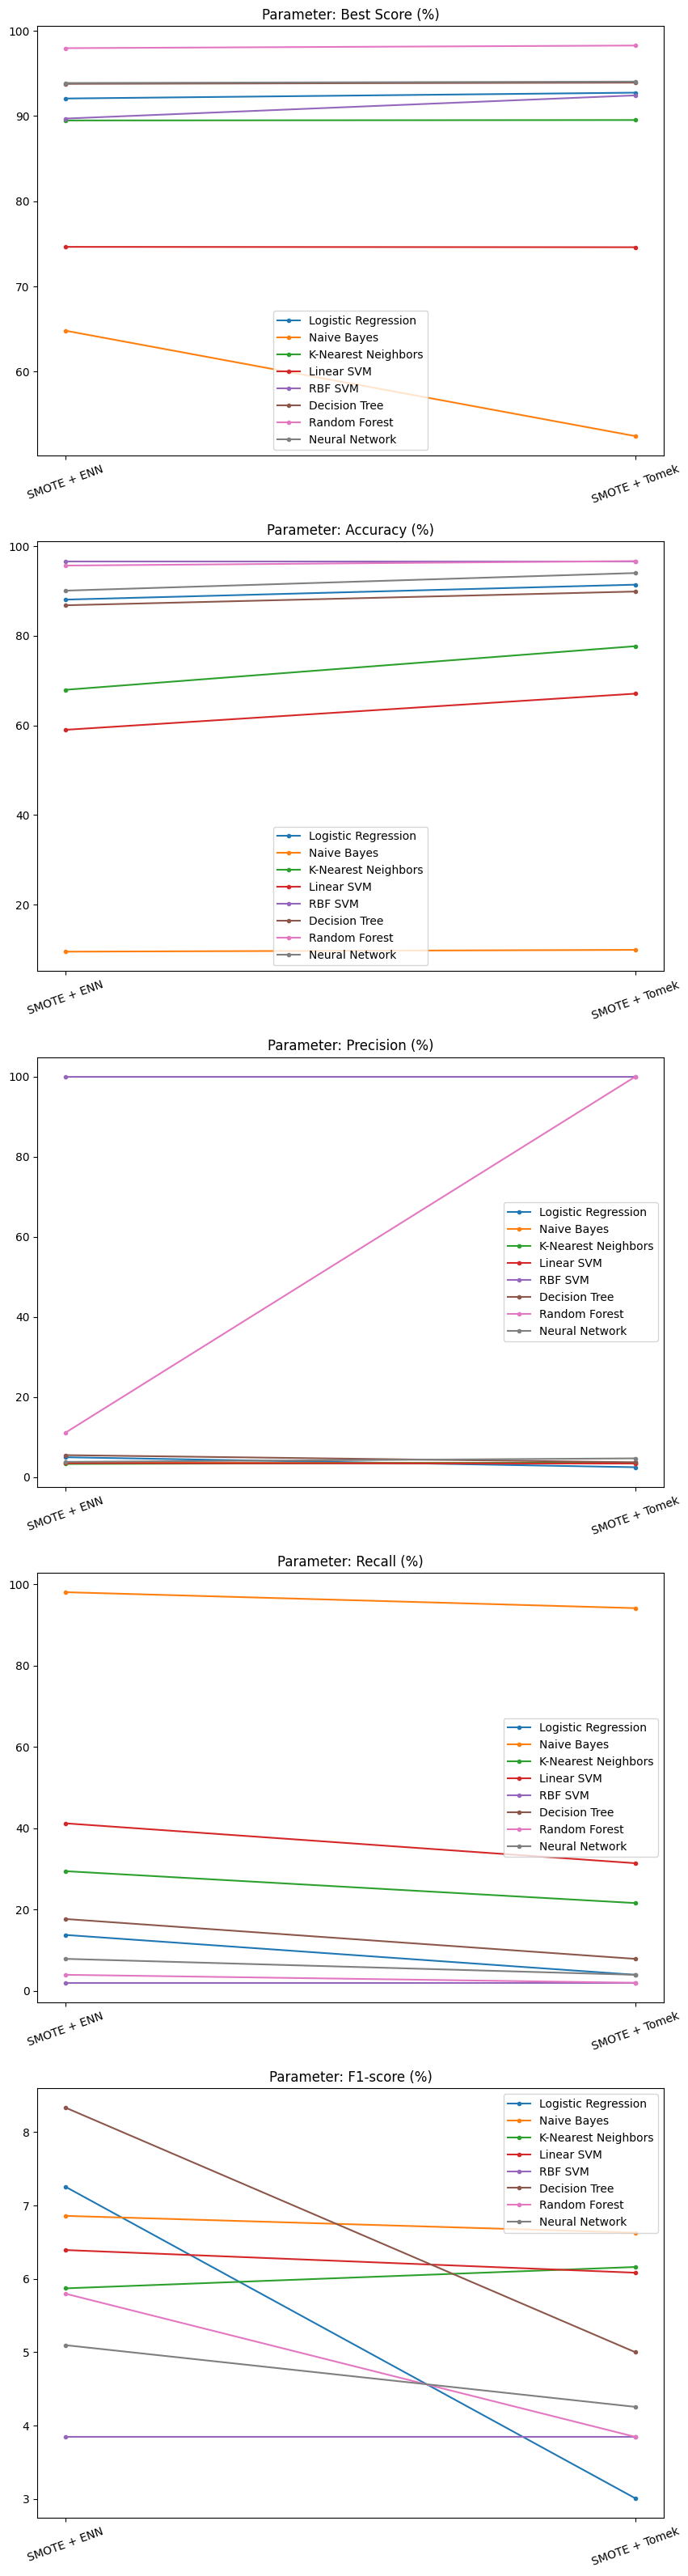

In [ ]:
plot_param_lines(combine_results)

## Conclusion

From the test above we may notice that:
- **the best ROC curve**
The best values were obtained with random forest clasifier (random under-sampling), logistic regression (random over-sampling) and decision tree (SMOTEEN). Still these changes are very small and using mentioned methods did not give a big improvement.
- **influence on the parameters change**
    - Accuracy (without changes - in all resampling methods have the same behaviour as on the unbalanced data)
    - Precision (random under-sampling lightly increase its value for all classification algorithms)
    - Recall (random under-sampling lightly increase its value for all classification algorithms exept Naive Bayes (it dropped almost at 0%), both over-sampling and combine-sampling methods similarly improve its value (don't work for Random Forest or RBF SVM))
    - F1-score (remains mainly the same value of 0%, with some minor exeptions (within 2-10%) for random under-sampling, over-sampling and combine methods)
- **the best balancing method**
All in all, I can not chose the best method, as **all of them have a poor influence on classification preformance and outcome quality**. 

In the future we may also try to use another balancing method - cost-sensitive learning. It means that we, simply, add some weights to the classification model (`class_weight` parameter; also use `compute_class_weight` from `sklearn.utils.class_weight`), so the dominant class have a smaller influence in comparison to the minor class.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61a96134-34b5-4312-b1dd-e380757bf282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>